In [2]:
#Imports
from math import *
import cmath
from cmath import sqrt
import numpy as np
import scipy as sp
import scipy.special
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import sys
import os
from PyQt4.QtGui import *

#Import custom modules
sys.path.append('/home/drake/Documents/Physics/Research/Python/Modules')
from physics import *

sns.set(font_scale=2.0)
sns.set_style("ticks")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')
mpl.rcParams.update({'font.family': 'serif', 'font.serif':'DejaVu Serif'})

%matplotlib notebook

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Load AFM data

In [3]:
#GUI prompt
# a = QApplication(sys.argv) 
# w = QWidget()
# w.resize(320, 240)
# w.setWindowTitle("Select File")
# file = QFileDialog.getOpenFileName(w, 'Select File', os.curdir)
# filename = file.partition('/Data/')[2]

#Or enter the filename manually
filename = 'ZnSe_3.6um_ppol_Row5_Site1_1.34V_20160714_00305'
fileextension = '.txt'
file = os.curdir + '/Data/' + filename + fileextension

Data = pd.read_csv(file, delimiter='\t', header=4).values
Data = np.multiply(np.subtract(Data,np.mean(Data)),10**9)
Data.shape

(511, 512)

## Read header for image width and height

In [4]:
with open(file) as searchfile:
    widthflag = False
    heightflag = False
    for idx,line in enumerate(searchfile):
        widthleft,widthsep,widthright = line.partition('Width: ')
        heightleft,heightsep,heightright = line.partition('Height: ')
        
        if widthsep: # True iff 'Width: ' in line
            widthflag = True
            
        if widthflag:
            Width = float(widthright[:-3]) #Cut off the ' um' at the end and convert to float
            widthflag = False
            
        if heightsep: # True iff 'Height: ' in line
            heightflag = True
            
        if heightflag:
            Height = float(heightright[:-3]) #Cut off the ' um' at the end and convert to float
            heightflag = False
        
        if idx==3: #The header in the data exported by Gwyddion is 4 lines long
            break

## Select plotting range

In [5]:
x = np.linspace(0,Width,len(Data[:,0]))
y = np.linspace(0,Height,len(Data[0,:]))

#Select x and y limits used in the plot
Select_xi = 0
Select_xf = Width

Select_yi = 0
Select_yf = Height

#Find index at which the array values are closest to the desired value
Select_xi_Index = min(range(len(Data[:,0])),key=lambda i: abs(x[i]-Select_xi))
Select_xf_Index = min(range(len(Data[:,0])),key=lambda i: abs(x[i]-Select_xf))

Select_yi_Index = min(range(len(Data[0,:])),key=lambda i: abs(y[i]-Select_yi))
Select_yf_Index = min(range(len(Data[0,:])),key=lambda i: abs(y[i]-Select_yf))

#Closest matching values
Select_xi = x[Select_xi_Index]
Select_xf = x[Select_xf_Index] 

Select_yi = y[Select_yi_Index]
Select_yf = y[Select_yf_Index]

## Plot data

<IPython.core.display.Javascript object>


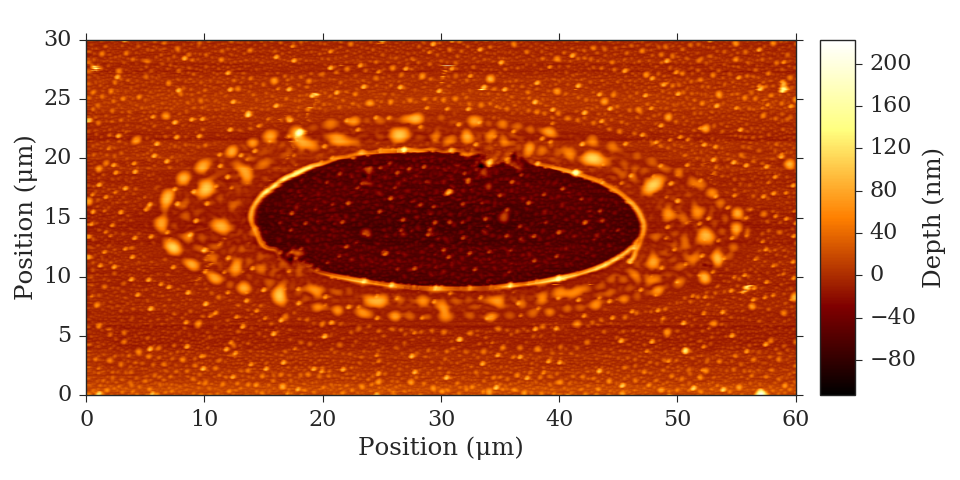

In [6]:
SelectData = Data[Select_yi_Index:Select_yf_Index,Select_xi_Index:Select_xf_Index]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x = np.linspace(0,Width,len(Data[:,0]))
y = np.linspace(0,Height,len(Data[0,:]))

im = ax.imshow(SelectData,cmap='afmhot',vmin=np.min(SelectData), vmax=np.max(SelectData),\
       extent=[Select_xi, Select_xf, Select_yi, Select_yf])
        
# im = ax.imshow(SelectData,cmap='afmhot',vmin=np.min(SelectData), vmax=np.max(SelectData),\
#         extent=[0, Select_xf-Select_xi, 0, Select_yf-Select_yi])

ax.set_xlabel('Position (μm)')
ax.set_ylabel('Position (μm)')
# ax1.set_xlim(0,max(x)) #Set x limits
# ax1.set_ylim(0,max(y)) #Set y limits


#Add color bar (same height as figure)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3) #Change 'pad' to adjust separation of plot and colorbar
colorbar = fig.colorbar(im, cax=cax)
colorbar.set_label('Depth (nm)')


plt.tight_layout()
#im.set_clim(np.min(SelectData),10) #Adjust contrast

plt.savefig(os.curdir + '/Plots/' + filename + '.pdf') #Save file with desired file extension (e.g. pdf, svg, png, tif, etc.)